### Identifying best method to normalize CycIF TMA data

#### Load Libraries

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import os
#import seaborn as sns; sns.set(style="white", color_codes=True, rc={'figure.figsize':(20,15)})
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

# Import custom functions
import wget

# Create anndata and scanpy
import anndata as ad
import scanpy as sc
import scanpy.external as sce

sc.set_figure_params(scanpy=True, dpi=180, dpi_save=300, frameon=True, vector_friendly=True, fontsize=14, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

#### Set Working Directory

In [2]:
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"

# HMS
#WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"
os.chdir(WD)

#### Load Data

In [31]:
# Load Data
adata = sc.read("atcl.h5ad")

In [32]:
# Load identified cell type by the cell calling algorithm
cell_type = pd.read_csv('cell_type.csv', dtype={'marker': str})
cell_type.head()

Unnamed: 0  other marker
0      109_1      0   CD3D
1      109_2      1  other
2      109_4      1  other
3      109_5      1  other
4      109_7      1  other

In [33]:
sc.pp.log1p(adata)
#adata.raw = adata

In [34]:
adata = adata[adata.obs['core'] == "109"]
adata

View of AnnData object with n_obs × n_vars = 5451 × 25 
    obs: 'core', 'Disease', 'StudyID', 'patient', 'n_genes', 'n_counts'

In [35]:
adata.obs['cell_type'] = cell_type['marker'].values

In [36]:
adata.obs['cell_type'].head()

index
109_1     CD3D
109_2    other
109_4    other
109_5    other
109_7    other
Name: cell_type, dtype: object

In [150]:
# Remove other identified bad markers
columns = ['CD2', 'CD3D', 'CD5', 'CD7','CD43', 'CD4', 'CD8', 'CD20','CD21', 'CD163', 'CD68', 'CD206']
remove = np.in1d(adata.var_names, columns)
adata = adata[:, remove]

In [126]:
adata.X[3][adata.X[3] < 4.75] = 0
adata.X[12][adata.X[12] < 6.2] = 0

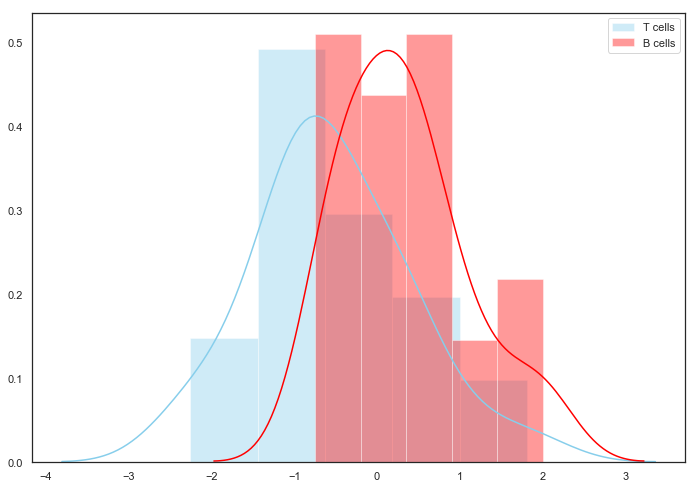

In [190]:
sns.distplot( adata.X[3] , color="skyblue", label="T cells")
sns.distplot( adata.X[12] , color="red", label="B cells")
#plt.axvline(6.2)
plt.legend()
# T cells - 4.75
# B cells - 6.2

In [7]:
adata = adata[adata.obs['core'] == "109"]

In [32]:
d = pd.DataFrame(adata_subset.X, index = adata_subset.obs.index, columns=adata_subset.var.index)

In [33]:
d.to_csv("atcl_109.csv", sep=',')

... storing 'cell_type' as categorical


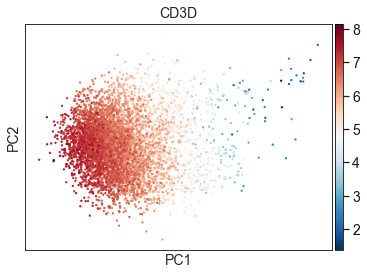

In [37]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CD3D',color_map="RdBu_r", components='1,2')

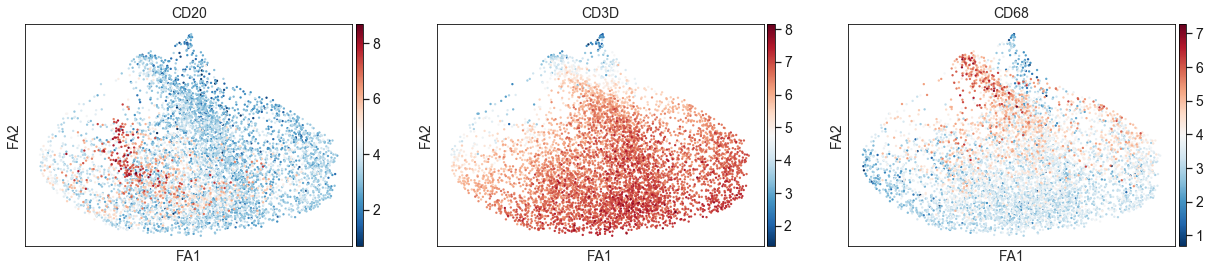

In [38]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=5)
sc.tl.draw_graph(adata)
sc.pl.draw_graph(adata, color=['CD20', 'CD3D', 'CD68'], color_map="RdBu_r")

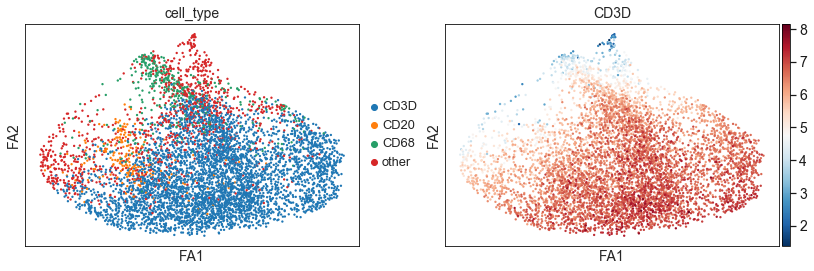

In [39]:
sc.pl.draw_graph(adata, color=['cell_type', 'CD3D'], color_map="RdBu_r")

In [225]:
# Remove bad patients
p1 = adata[~(adata.obs['patient']=='50'),:]
p1 = p1[~(p1.obs['patient']=='37'),:]

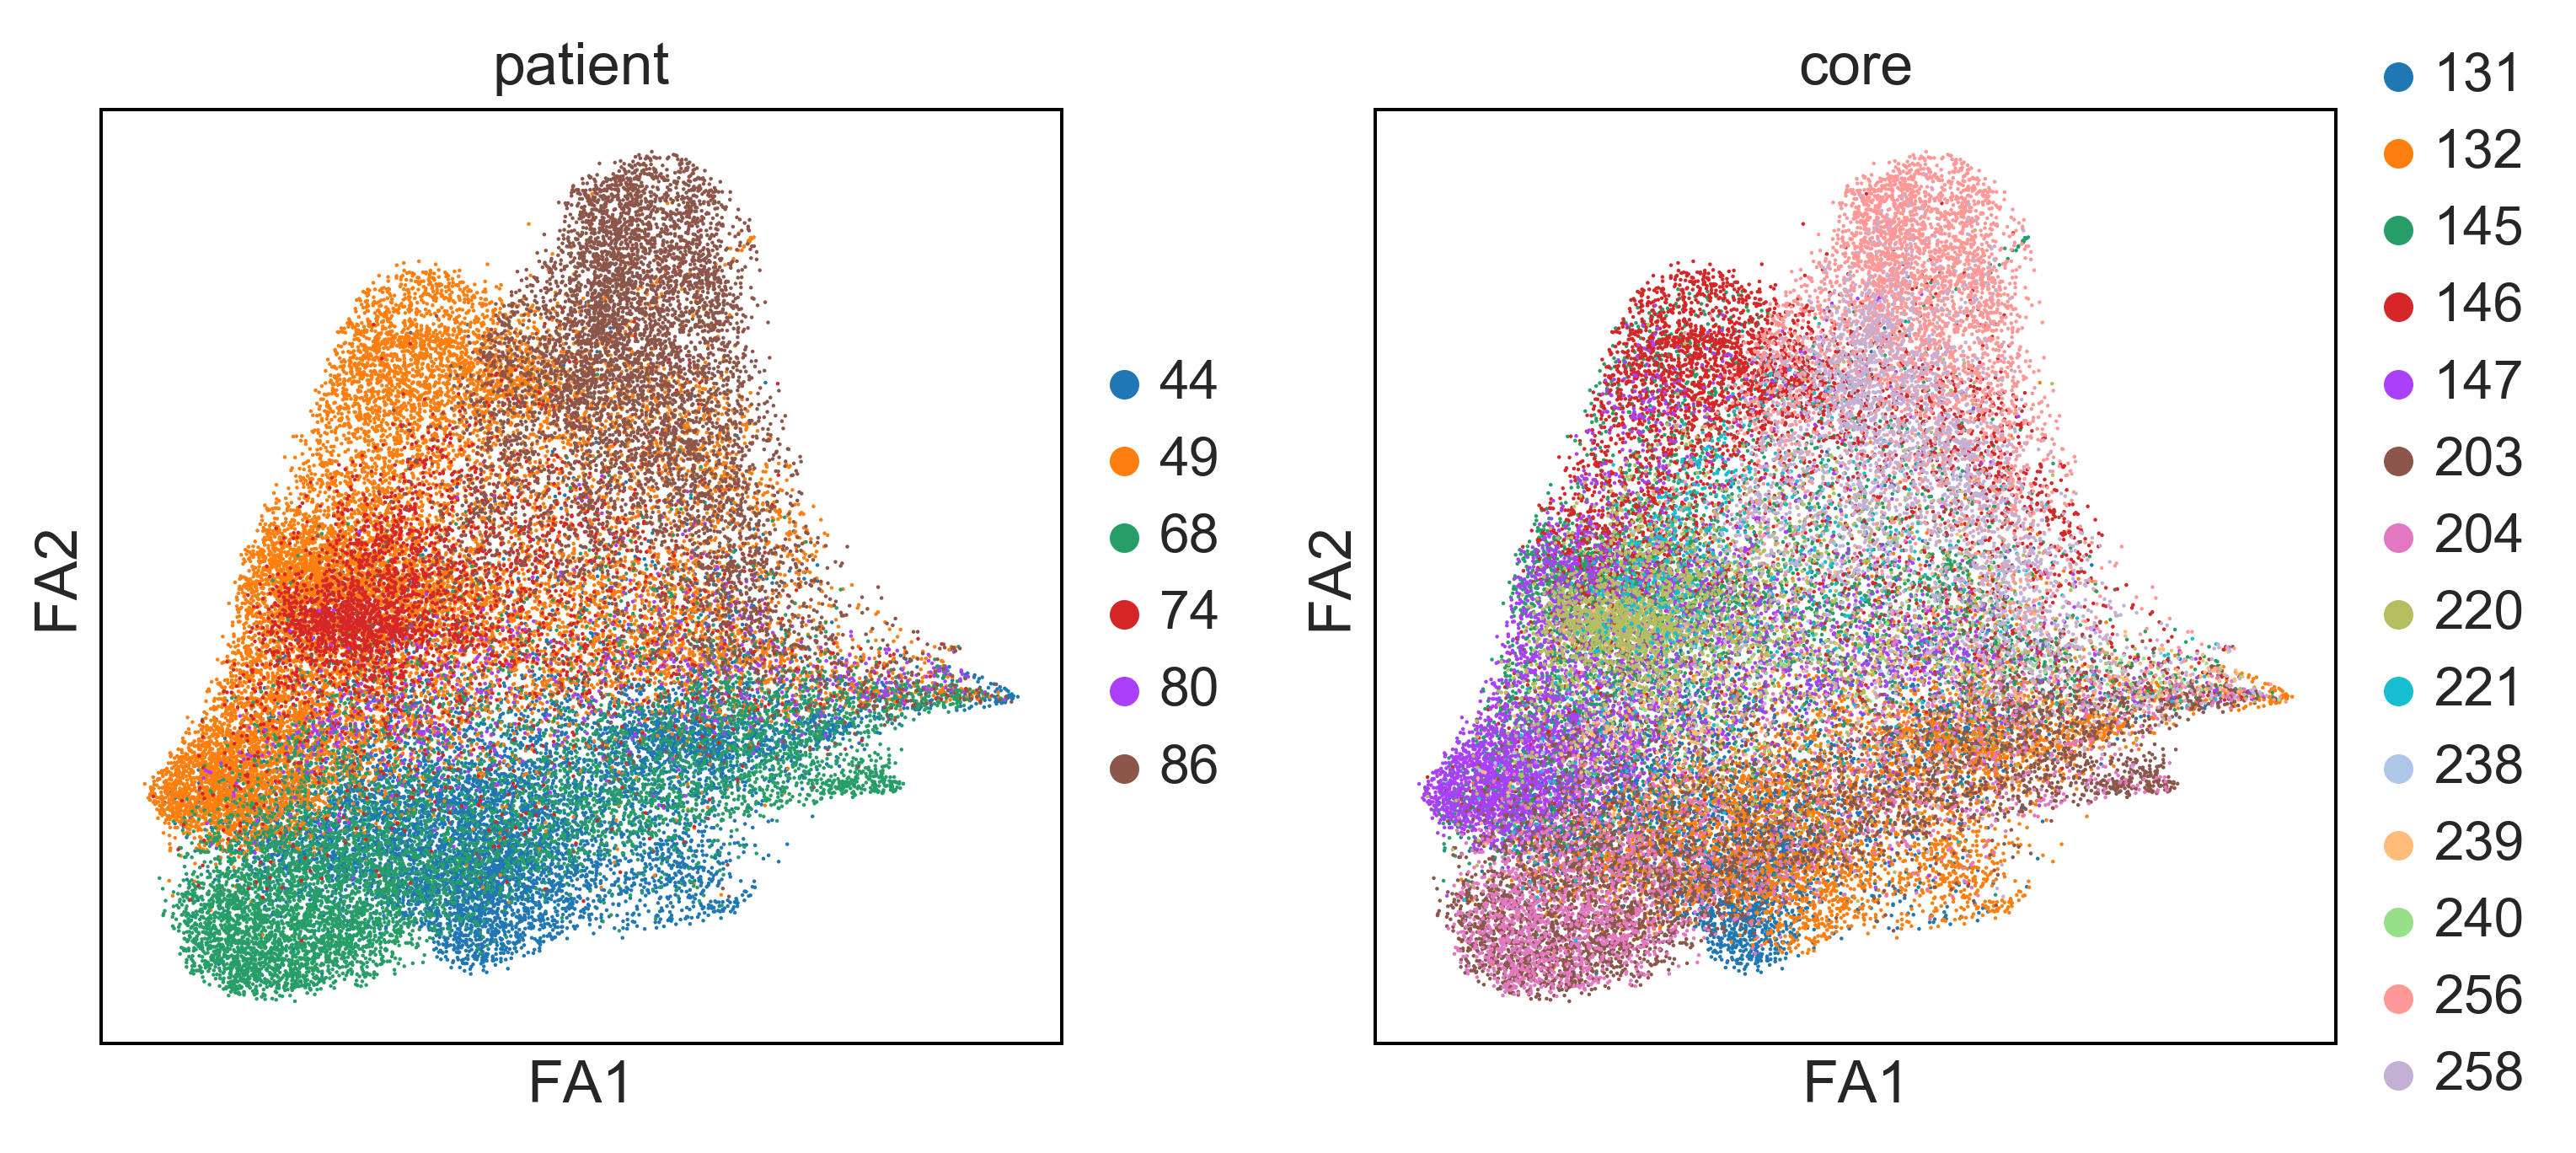

In [229]:
sc.pp.neighbors(p1, n_neighbors=30, n_pcs=5)
sc.tl.draw_graph(p1)
sc.pl.draw_graph(p1, color=['patient', 'core'], color_map="RdBu_r")

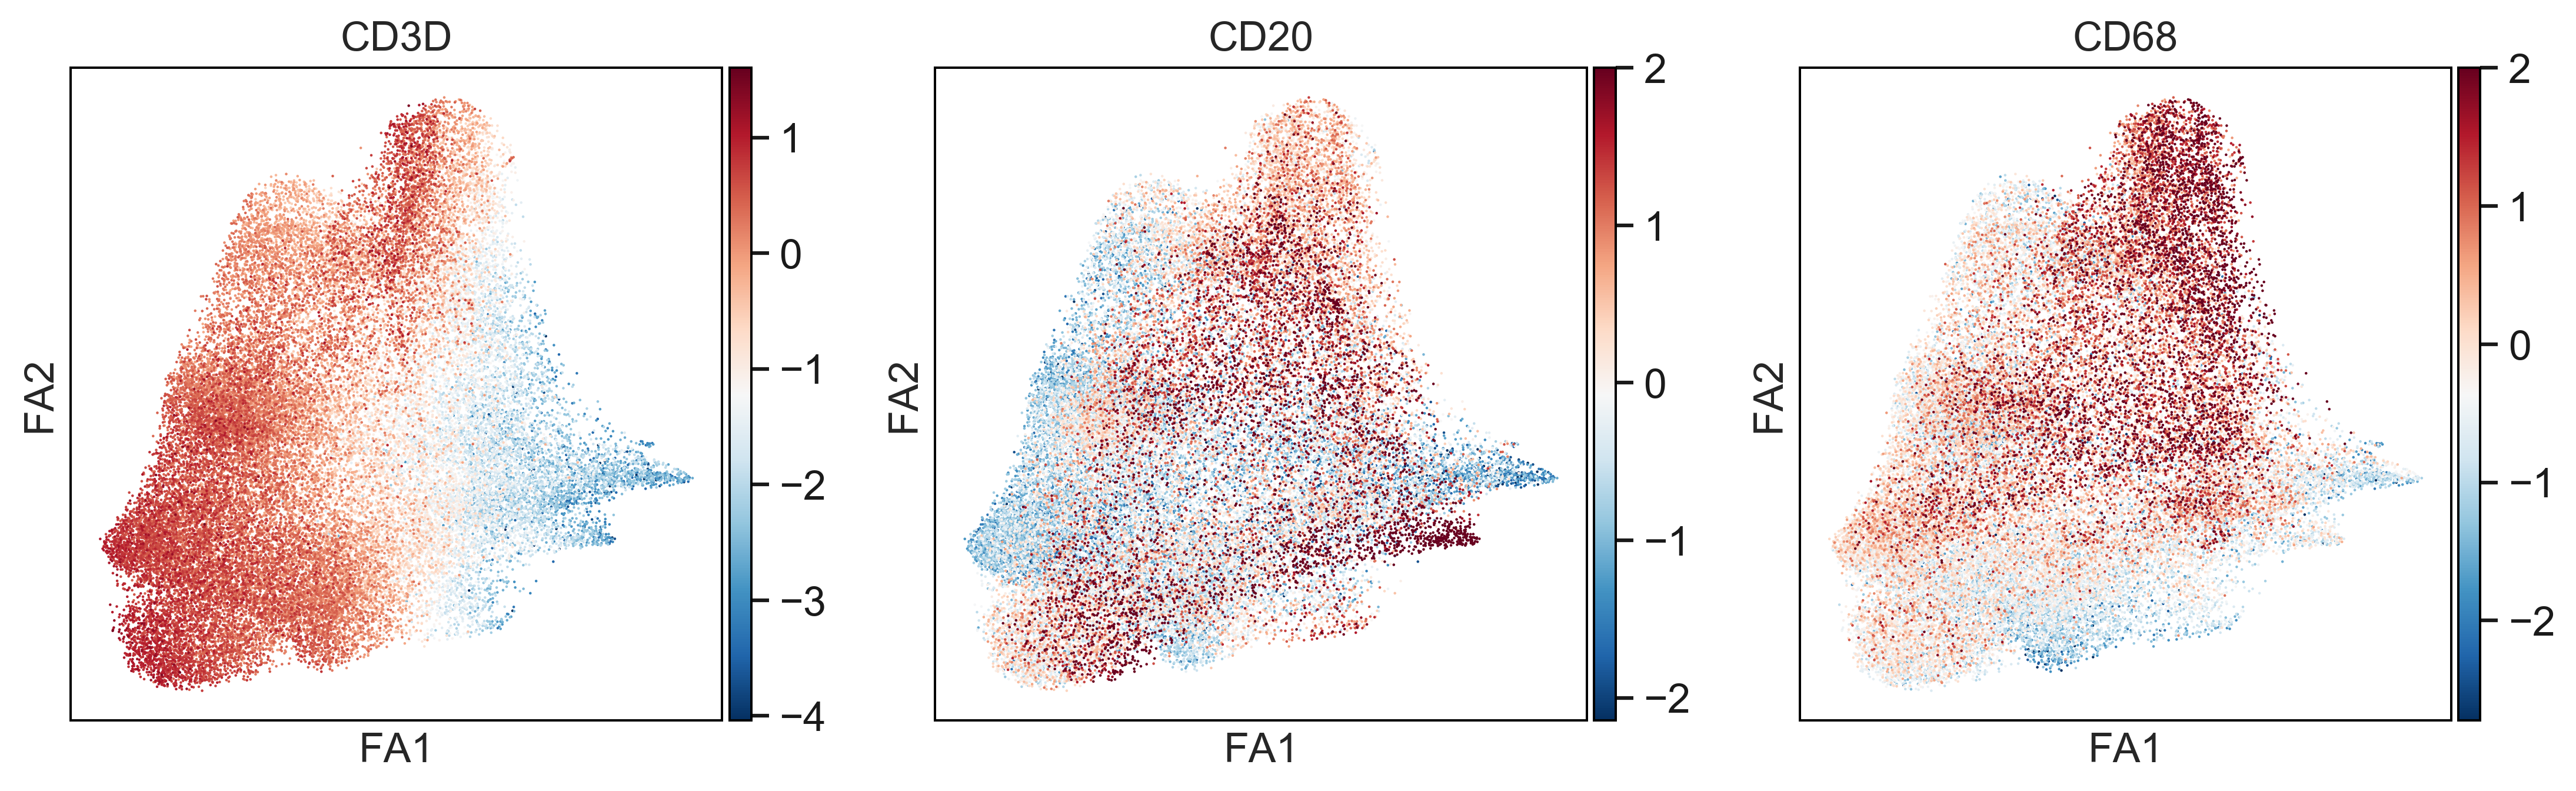

In [235]:
sc.pl.draw_graph(p1, color=['CD3D', 'CD20', 'CD68'], color_map="RdBu_r")

In [170]:
# Write Data
adata.write("atcl1.h5ad")

#### Remove DAPI and Background

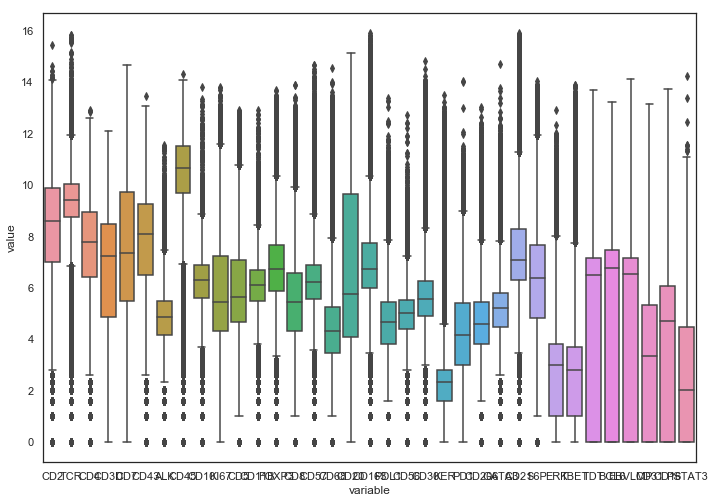

In [27]:
g = sns.boxplot(x="variable", y="value", data=pd.melt(np.log2(data+1)))
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

C:\Users\ajn16\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ajn16\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1167: RuntimeWarning: invalid value encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)
C:\Users\ajn16\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


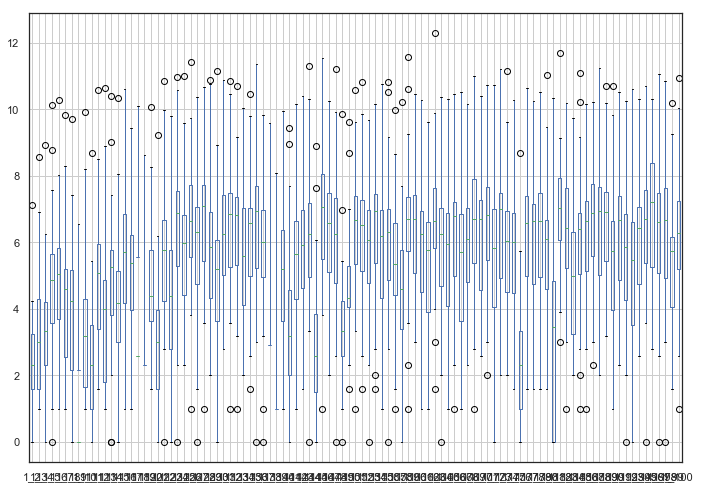

In [7]:
d = data.iloc[1:100,:]
d1 = d.T
np.log2(d1).boxplot()

C:\Users\ajn16\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


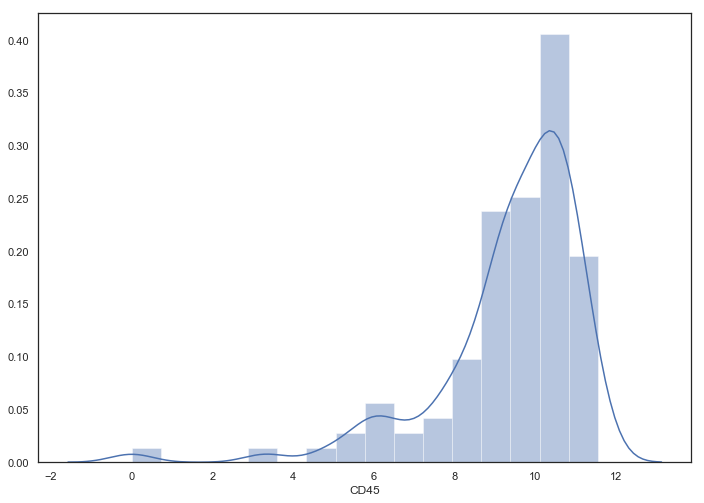

In [8]:
sns.distplot(np.log2(d["CD45"]))

In [17]:
# custom normalization
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
dd = mi_pp_normalize (d1)

100% [..................................................................................] 655 / 655Applying log transformation and quantile normalization...


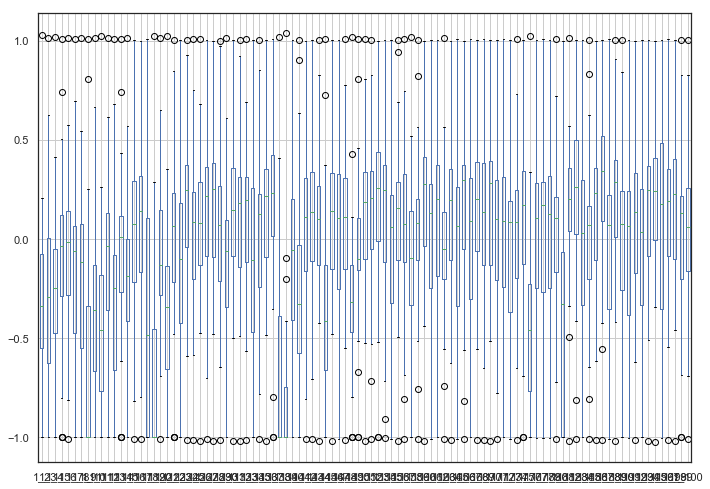

In [18]:
dd.boxplot()

In [24]:
dd.head()

cell_id       1_2       1_3       1_4       1_5       1_6       1_7       1_8  \
CD2      0.208288  0.117960  0.008326  0.190470  0.253283  0.096063  0.211635   
TCR      1.027866  1.013137  1.020670  1.009001  1.015007  1.010667  1.016098   
CD4     -0.015993 -0.186625 -0.217785 -0.007941  0.154501 -0.006141  0.019282   
CD3D    -0.098341 -0.339940 -0.415512 -0.115196 -0.071962 -0.074557 -0.281391   
CD7     -0.339547 -0.627347 -0.365227 -0.404765 -0.326624 -0.524974 -0.584551   

cell_id       1_9      1_10      1_11    ...         1_91      1_92      1_93  \
CD2     -0.289122 -0.171834 -0.193515    ...     0.141182  0.290656  0.402611   
TCR      1.006742  1.011780  1.025869    ...     0.829715  0.983636  0.817984   
CD4     -1.000000 -0.392166 -0.164250    ...     0.262689  0.066902  0.045620   
CD3D    -1.000000 -0.326940 -0.766873    ...     0.067026  0.404764  0.359170   
CD7     -1.000000 -1.000000 -0.458697    ...    -0.218362 -0.136181 -0.345123   

cell_id      1_94      1_95      1_96      1_97      1_98      1_99     1_100  
CD2      0.462535  0.441362  0.449849  0.376054  0.377778  0.172247  0.265485  
TCR      1.005990  1.000606  0.850308  0.758139  0.880563  1.006147  1.006074  
CD4      0.246077  0.342561  0.273853  0.191697  0.179108  0.185669  0.117073  
CD3D     0.288286  0.241799  0.261707  0.386669  0.414069  0.206718 -0.014461  
CD7     -0.095587 -0.060684 -0.277667 -0.188274 -0.086808 -0.271467 -0.148282  

[5 rows x 99 columns]

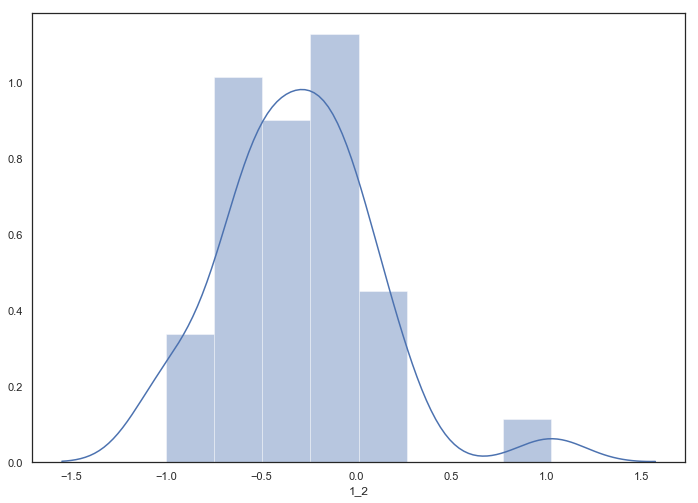

In [26]:
sns.distplot(dd["1_2"])

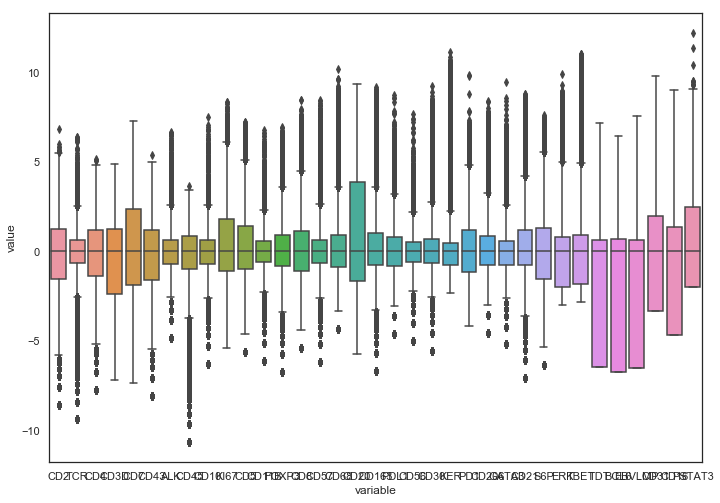

In [21]:
# RLE Plot
data_R = np.log2(data + 1)
features_meds = data_R.median(axis = 0)
data_RLE = data_R - features_meds
g = sns.boxplot(x="variable", y="value", data=pd.melt(data_RLE))
#g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [46]:
sns.distplot(d["CD3D"])

KeyError: 'CD3D'

#### Intalize R console

In [7]:
%load_ext rpy2.ipython

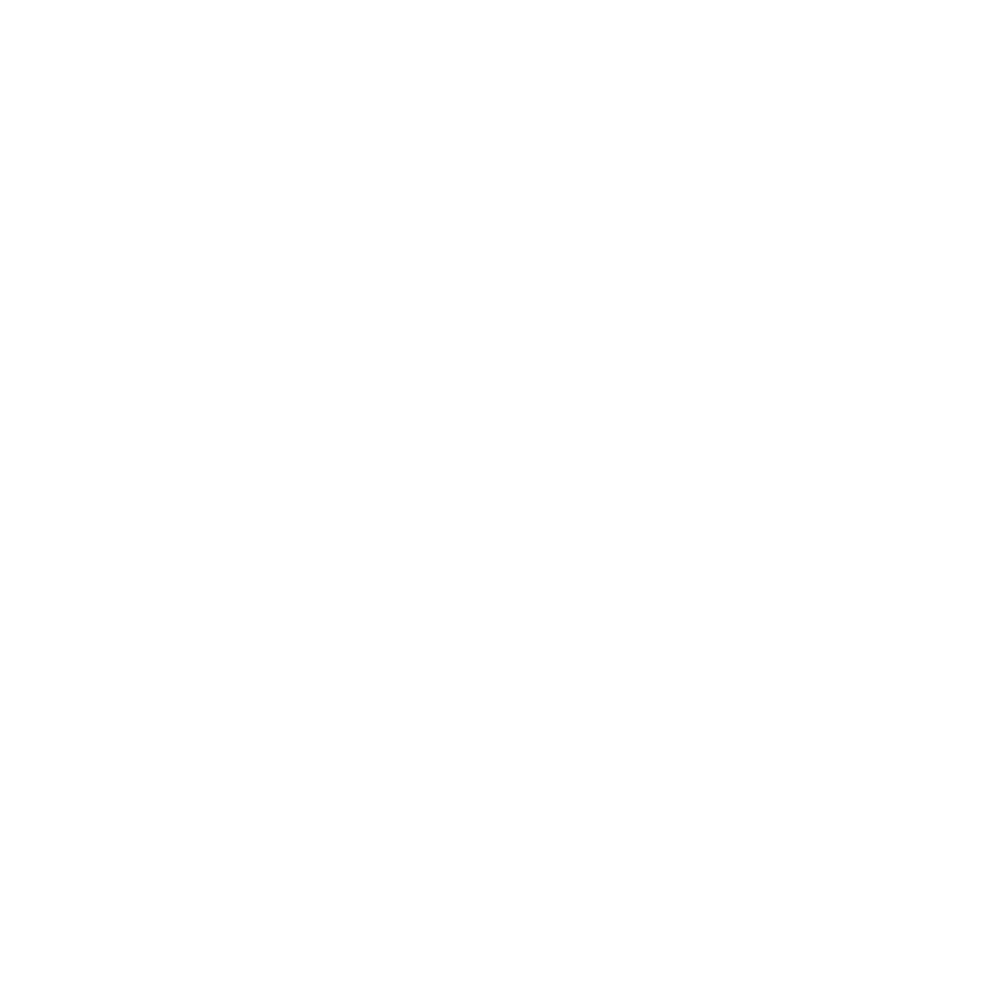

In [13]:
%%R -i data -w 5 -h 5 --units in -r 200
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
install.packages("reshape2", repos='http://cran.us.r-project.org', quiet=TRUE)
install.packages("cowplot", repos='http://cran.us.r-project.org', quiet=TRUE)

In [15]:
%%R -i data -w 5 -h 5 --units in -r 200
library(ggplot2)
library(reshape2)
ggplot(data = melt(log2(data)), aes(x=variable, y=value)) + geom_boxplot(aes(fill=variable))+ theme_classic()+ theme(legend.position="none", axis.text.x = element_text(angle = 90, hjust = 1))

RRuntimeError: Error: cannot allocate vector of size 82.9 Mb
